# 1. Importar librerias

In [134]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Esta es la libreria que se va a utilizar para la regresion logistica(modelos de clasificacion)
#Y nos dice que tan bien atina nuestro modelo a los datos de entrenamiento
from sklearn.metrics import accuracy_score

import seaborn as sns


# 2. Cargar dataset

In [135]:
df = pd.read_csv('../../data/cardio_train.csv', delimiter=';')
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# 3.Exploracion Inicial de los datos

In [2]:
df.head(5)

NameError: name 'df' is not defined

In [137]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

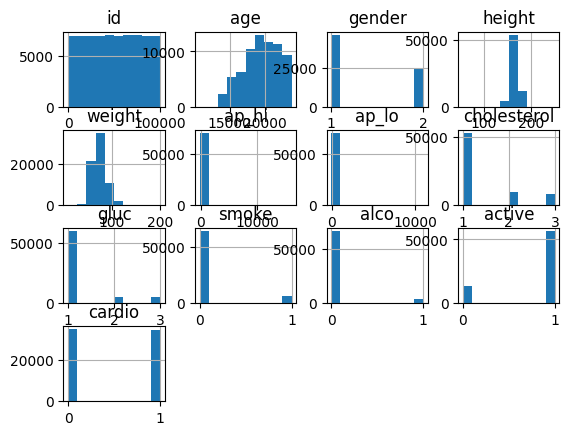

In [138]:
df.hist()

# 4. Preprocesamiento de datos

In [139]:
# Nos dio numeros negativos asi que tenemos que modificar estos datos
df[df['ap_hi'] < 0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [140]:
df[df['ap_lo'] < 0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,85816,22571,1,167,74.0,15,-70,1,1,0,0,1,1


In [141]:
df = df[(df['ap_hi'] >= 0) & (df['ap_lo'] >= 0)]

In [142]:
df.shape

(69992, 13)

In [143]:
df = df.drop(['id'], axis=1)

In [144]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [145]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022888,-0.081543,0.053655,0.020761,0.017664,0.154522,0.098715,-0.047639,-0.029727,-0.009937,0.238189
gender,-0.022888,1.000000,0.499066,0.155466,0.006079,0.015251,-0.035819,-0.020478,0.338171,0.170987,0.005947,0.008110
height,-0.081543,0.499066,1.000000,0.290979,0.005457,0.006151,-0.050249,-0.018603,0.187989,0.094416,-0.006564,-0.010867
weight,0.053655,0.155466,0.290979,1.000000,0.030618,0.043707,0.141780,0.106843,0.067768,0.067104,-0.016940,0.181705
ap_hi,0.020761,0.006079,0.005457,0.030618,1.000000,0.016063,0.023754,0.011774,-0.000976,0.001367,-0.000064,0.054482
ap_lo,0.017664,0.015251,0.006151,0.043707,0.016063,1.000000,0.024012,0.010797,0.005179,0.010596,0.004785,0.065732
cholesterol,0.154522,-0.035819,-0.050249,0.141780,0.023754,0.024012,1.000000,0.451585,0.010349,0.035757,0.009936,0.221165
gluc,0.098715,-0.020478,-0.018603,0.106843,0.011774,0.010797,0.451585,1.000000,-0.004771,0.011235,-0.006776,0.089313
smoke,-0.047639,0.338171,0.187989,0.067768,-0.000976,0.005179,0.010349,-0.004771,1.000000,0.340088,0.025855,-0.015487
alco,-0.029727,0.170987,0.094416,0.067104,0.001367,0.010596,0.035757,0.011235,0.340088,1.000000,0.025474,-0.007331


<Axes: >

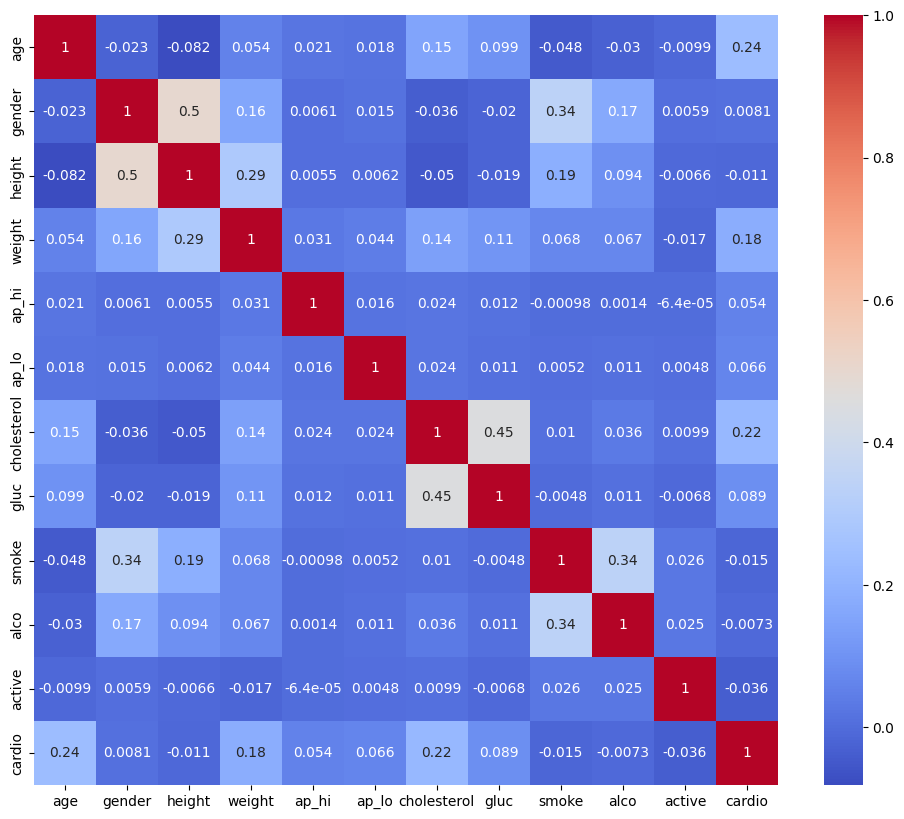

In [146]:
#Aqui vamos a realizar la correlacion entre las columnas y renglones
#Con esto podemos ver que columnas estan mas relacionadas entre si
#Y asi poder eliminar columnas que no aporten informacion relevante
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# 5. Seleccionar variables independientes o features (x) y la var dependiente (y)

In [147]:
x = df.drop(['cardio'], axis=1)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [148]:
y = df['cardio']
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 69992, dtype: int64

# 6. Dividir datos en entrenamiento y prueba

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, shuffle = True, random_state = 42) 

In [150]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
65339,20475,1,158,63.0,130,90,3,3,0,0,1
46001,15598,2,165,70.0,120,80,1,1,0,0,1
61987,20497,1,165,71.0,110,70,1,1,0,0,0
2514,21728,1,160,67.0,120,80,1,1,0,0,1
22459,18922,1,165,60.0,160,90,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
37200,15057,1,164,79.0,110,70,1,1,0,0,1
6266,19554,1,164,73.0,140,90,1,1,0,0,1
54893,17605,1,164,75.0,120,80,1,1,0,0,1
860,18227,1,167,70.0,120,80,1,1,0,0,0


In [151]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
37376,15052,1,163,59.0,120,80,1,1,0,0,1
7291,17998,1,159,58.0,120,80,1,1,0,1,1
29113,19043,1,165,102.0,140,80,3,1,0,0,1
65033,22887,1,171,82.0,130,80,2,2,0,0,1
37029,22792,1,162,72.0,100,60,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
664,20281,1,160,60.0,120,80,1,1,0,0,1
36149,19525,1,160,69.0,130,80,1,1,0,0,1
55166,22680,1,155,55.0,130,80,2,1,0,0,1
14312,18319,1,171,94.0,130,90,1,1,0,0,1


In [152]:
y_train

65339    0
46001    1
61987    0
2514     1
22459    0
        ..
37200    0
6266     1
54893    0
860      0
15796    0
Name: cardio, Length: 55993, dtype: int64

In [153]:
y_test

37376    0
7291     1
29113    1
65033    1
37029    0
        ..
664      0
36149    0
55166    1
14312    0
23676    0
Name: cardio, Length: 13999, dtype: int64

# 7. Escalamiento -> Opcional


In [154]:
#Importante diferenciar el fit transform del transform


"""
scaler = StandardScaler()
x_train_escalado = scaler.fit_transform(x_train)
x_test_escalado = scaler.transform(x_test)
"""


'\nscaler = StandardScaler()\nx_train_escalado = scaler.fit_transform(x_train)\nx_test_escalado = scaler.transform(x_test)\n'

# 8. Seleccionar el modelo y entrenarlo

In [155]:
model = LogisticRegression()

In [156]:
model.fit(x_train, y_train)

/Users/memopispo/Documents/NumpyPandas/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 9. Hacer predicciones

In [157]:
paciente = [
    8760,#edad
    2,#genero
    169,#height
    79.0,#weight
    130,#ap_hi
    80,#ap_lo
    2,#colesterol
    1,#gluc
    1,#smoke
    0,#alco
    0,#active
]

In [158]:
prediccion_usuario = model.predict([paciente])

/Users/memopispo/Documents/NumpyPandas/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [159]:
prediccion_usuario

array([0])

In [160]:
y_pred= model.predict(x_test)

In [161]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [162]:
y_test

37376    0
7291     1
29113    1
65033    1
37029    0
        ..
664      0
36149    0
55166    1
14312    0
23676    0
Name: cardio, Length: 13999, dtype: int64

# 10. Evaluar modelo

In [163]:
accuracy_score(y_test, y_pred)

0.7031930852203729

In [164]:
#Guardar el modelo

import joblib
joblib.dump(model, 'modelo_de_clasificacion.pkl')

['modelo_de_clasificacion.pkl']